# Ch02 실습 환경 설정과 파이토치 기초

# 2.2. 파이토치 기초 문법

### 텐서 생성 및 변환

In [1]:
# 텐서 생성
import torch

print(torch.tensor([[1,2], [3,4]])) # 2차원 형태의 텐서 생성
#print(torch.tensor([[1,2], [3,4]], device = "cuda:0"))  # GPU에 텐서 생성
print(torch.tensor([[1,2], [3,4]], dtype=torch.float64))  # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
# 텐서를 ndarray로 변환
temp = torch.tensor([[1,2], [3,4]])
print(temp.numpy()) # 텐서를 ndarray로 변환
#temp = torch.tensor([[1,2], [3,4]], device="cude:0")
print(temp.to("cpu").numpy()) # GPU 상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


### 텐서의 인덱스 조작

In [3]:
temp = torch.FloatTensor([1,2,3,4,5,6,7])  # 파이토치로 1차원 벡터 셍성
print(temp[0], temp[1], temp[-1])  # 인덱스로 접근
print('------------------------------------')
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
------------------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


### 텐서 연산 및 차원 조작

In [4]:
# 벡터 두개의 사칙 연산
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
print(w - v)

tensor([2, 2, 3])


In [5]:
# 텐서의 차원 조작
temp = torch.tensor([
    [1,2], [3,4]])
print(temp.shape)
print('--------------------------------')
print(temp.view(4,1)) # 2x2 행렬을 4x1로 변형
print('--------------------------------')
print(temp.view(-1)) # 2x2 행렬을 1차원 벡터로 변형
print('--------------------------------')
print(temp.view(1,-1)) # -1은 (1,?)와 같은의미. 다른 차원으로부터 해당 값을 유추. 2x2 행렬을 1x4로 변형
print('--------------------------------')
print(temp.view(-1,1))  # (?,1)의 의미. 2x2 행렬을 4x1로 변형

torch.Size([2, 2])
--------------------------------
tensor([[1],
        [2],
        [3],
        [4]])
--------------------------------
tensor([1, 2, 3, 4])
--------------------------------
tensor([[1, 2, 3, 4]])
--------------------------------
tensor([[1],
        [2],
        [3],
        [4]])


### 모델 정의

In [10]:
# Sequential 신경망을 정의
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True)
    )

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.size(0), -1)
      x = self.layer3(x)
      return x

model = MLP() # 모델에 대한 객체 생성

print("Printing Children\n------------------------------")
print(list(model.children()))
print("Printing Modules\n------------------------------")
print(list(model.modules()))


Printing Children
------------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
Printing Modules
------------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(

In [11]:
# 함수로 신경망을 정의
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
  activation = nn.ReLU()
  output = nn.Linear(in_features=hidden_features, out_features=out_features, bia=True)
  net = nn.Sequential(hidden, activation, output)
  return net

# 2.4. 파이토치 코드 맛보기

## 피처 확인
- price: 자동차 가격

- maint: 자동차 유지 비용

- doors: 자동차 문 개수

- persons: 수용 인원

- lug_capacity: 수하물 용량

- safety: 안전성

- output: 차 상태

    => unacc(허용 불가능한 수준), acc(허용 사능한 수준), 양호(good), 매우 좋은(very good, vgood) 중 하나의 값을 갖음

=> 6가지 칼럼 정보를 이용하여 차 상태를 예측

## 라이브러리 호출

In [1]:
import torch
import torch.nn as nn
import numpy as np  # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 파이썬 라이브러리 패키지
import pandas as pd # 데이터 처리를 위해 널리 사용되는 파이썬 라이브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 데이터 로드

In [2]:
dataset = pd.read_csv("/content/car_evaluation.csv")
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- 단어를 벡터로 바꾸는 임베딩 처리가 필요

## 데이터셋 분포 확인

<Axes: ylabel='count'>

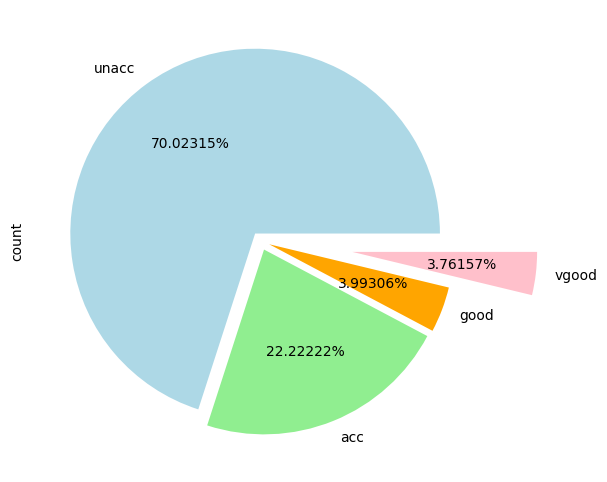

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
colors = ['lightblue', 'lightgreen', 'orange', 'pink'], explode = (0.05, 0.05, 0.05, 0.5))

- 대부분의 자동차는 허용 불가능한 상태(70%)
- 양호한 상태의 자동차 비율이 매우 낮음

## 데이터 전처리
- 딥러닝은 통계 알고리즘을 기반으로 하기 때문에 단어를 숫자(텐서)로 변화해야 함
- 가장 먼저 필요한 전처리: 데이터 파악
- 예제의 데이터 칼럼들은 모두 범주형 데이터

### 단어 -> 배열 변환
- 단어를 범주형 타입으로 변환
- 범주형 타입을 텐서로 변환

In [8]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']  # 예제 데이터셋 칼럼들의 목록

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')  # astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values # 1
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)  # 2
categorical_data[:10] # 합친 넘파이 배열 중 10개의 행을 출력

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)


```
price = dataset['price'].cat.codes.values # 1
```
- 범주형 데이터를 텐서로 변환하기 위해서는 다음과 같은 절차가 필요

  : 범주형 데이터 -> dataset[category] -> 넘파이 배열 -> 텐서
  - 범주형 데이터(단어)를 숫자(넘파이 배열)로 변환하기 위해 cat.codes를 사용
  - cat.codes는 어떤 클래스가 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 있음



```
categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)  # 2
```
- np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용



<np.stack과 np.concatenate>
- 공통점: 넘파이 객체를 합칠 때 사용하는 메서드
- 차이점: 차원의 유지 여부
- np.concatenate
  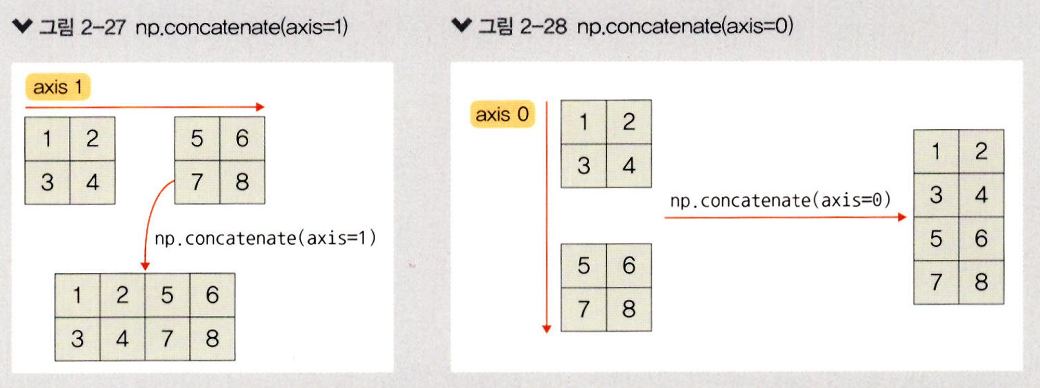
  : 선택한 축을 기준으로 두 개의 배열을 연결
- np.stack
  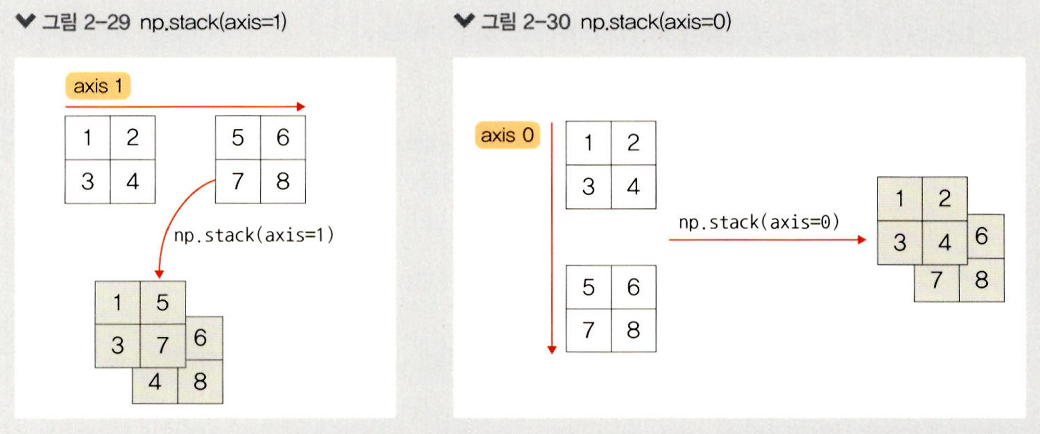
  : 배열들을 새로운 축으로 합침
  - 1차원 배열들을 합쳐서 2차원 배열을 만듬
  - 2차원 배열 여러 개를 합쳐 3차원 배열을 만듬
  - 반드시 두 배열의 차원이 동일해야 함

In [10]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype= torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [12]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)  # 1
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])



```
outputs = pd.get_dummies(dataset.output)  # 1
```

- get_dummies: 가변수로 만들어 주는 함수

  => 문자를 숫자 (0, 1)로 바꿔줌



### 범주형 칼럼을 N차원으로 변환
- 워드 임베딩: 유사한 단어끼리 유사하게 인코딩되도록 표현되는 방법
- 높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악

=> 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용

- 배열을 N차원으로 변환
  - 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의
  
    => 칼럼의 고유 값 수를 2로 나누는 것을 많이 사용(예, price 칼럼은 네 개의 고유 값을 갖기 때문에 임베딩 크기가 2)

In [13]:
# (모든 범주형 칼럼의 고유 값 수, 차원의 크기 형태)로 배열을 만듬
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


### 데이터셋 분리

In [15]:
# 데이터셋을 훈련과 테스트 용도로 분리
total_records = 1728
test_records = int(total_records*.2)  # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [16]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


## 모델 정의

### 모델의 네트워크 생성

In [17]:
class Model(nn.Module): # 1
  def __init__(self, embedding_size, output_size, layers, p=0.4): # 2
    super().__init__()  # 3
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

    for i in layers:  # 4
      all_layers.append(nn.Linear(input_size, i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)  # 신경망의 모든 계층이 순차적으로 실행되도록 모든 계층에 대한 목록(all_layers)을 nn.Sequential 클래스로 전달

  def forward(self, x_categorical): # 5
    embeddings = []
    for i,e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
    x = torch.cat(embeddings, 1)  # 넘파이의 concatenate와 같지만 대상이 텐서가 됨
    x = self.embedding_dropout(x)
    x = self.layers(x)
    return x



```
class Model(nn.Module): # 1
```
- 클래스 형태로 구현되는 모델은 nn.Module을 상속받음





```
  def __init__(self, embedding_size, output_size, layers, p=0.4): # 2
```
- \__init__( )
  - 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용
  - 객체가 생성될 때 자동으로 호출
- 매개변수
  - self: 첫번째 파라미터는 self를 지정, 자기 자신을 의미
  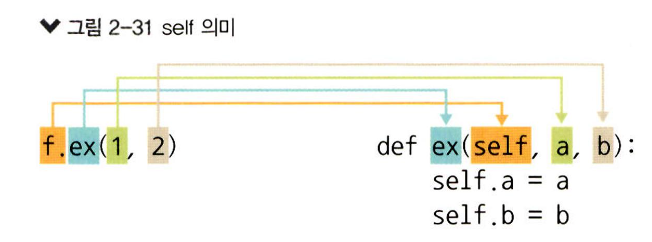
  - embedding_size: 범주형 칼럼의 임베딩 크기
  - output_size: 출력층의 크기
  - layers: 모든 계층에 대한 목록
  - p: 드롭아웃(기본값은 0.5)




```
super().__init__()  # 3
```
- 부모 클래스(Model 클래스)에 접근할 때 사용
- super는 self를 사용하지 않음



```
for i in layers:  # 4
```

- 모델의 네트워크 계층을 구축하기 위해 for문을 이용하여 각 계층을 all_layers 목록에 추가
- 추가된 계층
  - Linear: 선형 계층(linear layer)은 입력 데이터에 선형 변환을 진행한 결과. 입력과 가중치를 곱한 후 바이어스를 더한 결과
  - ReLU: 활성화 함수로 사용
  - BatchNorm1d: 배치 정규화 용도로 사용
  - Dropout: 과적합 방지에 사용



```
def forward(self, x_categorical): # 5
```
- forward() 메서드는 학습 데이터를 입력 받아서 연산을 진행
- 모델 객체를 데이터와 함께 호출하면 자동으로 실행


### 모델 클래스의 객체 생성
- 모델 훈련을 위해서 앞에서 정의했던 Model 클래스의 객체를 생성
- 객체를 생성하면서 (범주형 칼럼의 임베딩 크기, 출력 크기, 은닉층의 뉴런, 드롭아웃)을 전달

In [18]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


- 출력: 모델에 대한 구조(네트워크)

### 모델의 파라미터 정의
- 모델을 훈련시키기 전에 손실 함수와 옵티마이저에 대한 정의를 해야함
- 예제에서는 데이터를 분류해야하기 때문에 크로스 엔트로피 손실 함수를 사용, 옵티마이저로는 아담을 사용

In [19]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### CPU/GPU 사용 지정
- GPU가 있다면 GPU를 사용하고, 없다면 CPU를 사용하도록 하는 코드

In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda") # GPU가 있다면 GPU를 사용
else:
    device = torch.device("cpu")  # GPU가 없다면 CPU를 사용

## 모델 훈련

### 모델 학습

In [22]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs): # for문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
  i += 1
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

  if i%25 == 1:
    print(f'epoch: {i:3}  loss: {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward()  # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
  optimizer.step()  # 옵티마이저 함수의 step( ) 메서드를 이용하여 기울기 업데이트

print(f'epoch: {i:3}  loss: {single_loss.item():10.10f}') # 오차가 25 에포크마다 출력

epoch:   1  loss: 1.48090601
epoch:  26  loss: 1.29961801
epoch:  51  loss: 1.20663071
epoch:  76  loss: 1.11532962
epoch: 101  loss: 1.01834118
epoch: 126  loss: 0.90377611
epoch: 151  loss: 0.83533490
epoch: 176  loss: 0.72431552
epoch: 201  loss: 0.68770391
epoch: 226  loss: 0.65761548
epoch: 251  loss: 0.63744271
epoch: 276  loss: 0.60874826
epoch: 301  loss: 0.59905261
epoch: 326  loss: 0.60158753
epoch: 351  loss: 0.58364350
epoch: 376  loss: 0.58225471
epoch: 401  loss: 0.57735902
epoch: 426  loss: 0.57211798
epoch: 451  loss: 0.57776314
epoch: 476  loss: 0.58300185
epoch: 500  loss: 0.5675846338


### 테스트 데이터셋으로 모델 예측

In [23]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data).to(device)
  loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.57158446


- 테스트 데이터셋에 대한 손실 값
- 훈련 데이터셋에서 도출된 손실 값과 비슷함

  => 과적합 발생하지 않음

### 모델의 예측 확인
- 모델 네트워크의 output_size에 4를 지정했음

  => 출력층에 네 개의 뉴런이 포함

  => 각 예측에 네 개의 값이 포함

In [24]:
print(y_val[:5])

tensor([[ 2.3282,  1.1933, -2.8373, -3.0551],
        [ 2.6320,  1.4951, -2.7355, -2.7770],
        [ 3.6293,  1.9082, -4.2962, -4.4952],
        [ 2.8098,  1.6045, -3.6327, -4.1466],
        [ 1.8303,  0.7888, -2.5910, -2.9124]])


### 가장 큰 값을 갖는 인덱스 확인

In [25]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


- 인덱스가 0인 값이 인덱스가 1인 값보다 큼

  => 처리된 출력이 0임

## 모델 평가

### 테스트 데이터셋을 이용한 정확도 확인

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[257   2]
 [ 83   3]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       259
           1       0.60      0.03      0.07        86

    accuracy                           0.75       345
   macro avg       0.68      0.51      0.46       345
weighted avg       0.72      0.75      0.66       345

0.7536231884057971


## 딥러닝 분류 모델의 성능 평가 지표


### 용어
- True Positive: 모델(분류기)가 '1'이라고 예측했는데 실제 값도 '1'인 경우
- True Negative: 모델(분류기)가 '0'이라고 예측했는데 실제 값도 '0'인 경우
- False Positive: 모델(분류기)가 '1'이라고 예측했는데 실제 값은 '0'인 경우. Type 1 오류라고도 함
- False Negative: 모델(분류기)가 '0'이라고 예측했는데 실제 값은 '1'인 경우. Type 2 오류라고도 함

### 성능 평가 지표
#### 정확도
- 전체 예측 건수에서 정답을 맞힌 건수의 비율
- 이때 맞힌 정답이 긍정이든 부정이든 상관 없음
- (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

#### 재현율
- 실제로 정답이 1이라고 할 때 모델(분류기)도 1로 예측한 비율
- 처음부터 데이터가 1일 확률이 적을 때 사용하면 좋음
- Trus Positive / (True Positive + False Negative)

#### 정밀도
- 모델(분류기)이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율
- True Positive / (True Positive + False Positive)

#### F1-스코어
- 정밀도와 재현율을 트레이드 오프 관계

  : 정밀도가 높으면 재현율이 낮고, 재현율이 높으면 정밀도가 낮음

  => 이러한 문제를 해결하기 위해, 정밀도와 재현율의 조화 평균을 이용한 것이 F1-스코어 평가

- 조화 평균
  - 2 * (Precision*Recall) / (Precision+Recall)